## Módulo 1

In [1]:
#Importando as bibliotecas

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

iris = load_iris()
x = iris.data #[n_amostras, n_features]
y = iris.target # Vetor de alvo [n_amostras]

print("Forma das features (x): ", x.shape)
print("Forma das caracteristicas (x): ", x.shape[1])
print("Forma do valor alvo (y): ", y.shape)

Forma das features (x):  (150, 4)
Forma das caracteristicas (x):  4
Forma do valor alvo (y):  (150,)


### Treino e Teste

### Particionar os dados para treinamento

In [2]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

print("Tamanho do conjunto do treinamento: ", x_train.shape)
print("Tamanho do conjunto do teste: ", x_test.shape)

Tamanho do conjunto do treinamento:  (105, 4)
Tamanho do conjunto do teste:  (45, 4)


### Árvore de decisão

In [3]:
tree_model = DecisionTreeClassifier(random_state=30)
tree_model.fit(x_train, y_train)
print(tree_model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 30, 'splitter': 'best'}


### Predição

In [4]:
y_tree_predict = tree_model.predict(x_test)
accuracy_tree = accuracy_score(y_test, y_tree_predict)

print(accuracy_tree)

0.9555555555555556


### KNN K-Nearest Neighbors

### Escalonamento de Dados

In [5]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn_model = KNeighborsClassifier()
knn_model.fit(x_train_scaled, y_train)

y_pred_knn = knn_model.predict(x_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f'KNN: {accuracy_knn:.2f}%')

KNN: 0.91%


# Módulo 2 - Validação

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

In [7]:
data = {
    'Nome': ['Charmander', 'Squirtle', 'Growlithe', 'Psyduck', 'Vulpix', 'Poliwag',
             'Magmar', 'Tentacool', 'Cyndaquil', 'Totodile', 'Torchic', 'Mudkip',
             'Chimchar', 'Piplup', 'Fennekin', 'Froakie'],
    'Tipo': ['Fogo', 'Água', 'Fogo', 'Água', 'Fogo', 'Água',
             'Fogo', 'Água', 'Fogo', 'Água', 'Fogo', 'Água',
             'Fogo', 'Água', 'Fogo', 'Água'],
    'Attack': [52, 48, 70, 52, 50, 50, 95, 40, 49, 65, 60, 70, 58, 51, 61, 56],
    'Speed': [65, 43, 60, 55, 65, 90, 93, 70, 65, 43, 45, 40, 61, 50, 72, 71]
}

df_pokemon = pd.DataFrame(data)
le = LabelEncoder()
df_pokemon['Tipo'] = le.fit_transform(df_pokemon['Tipo'])

x_pokemon = df_pokemon[['Attack', 'Speed']].values
y_pokemon = df_pokemon['Tipo'].values

df_pokemon.head()

,Nome,Tipo,Attack,Speed
0,Charmander,0,52,65
1,Squirtle,1,48,43
2,Growlithe,0,70,60
3,Psyduck,1,52,55
4,Vulpix,0,50,65


### Treino/Teste Hold-Out

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_pokemon, y_pokemon, test_size=0.3, random_state=30)

### Função para visualização

In [9]:
def plot_model(model, x_train, y_train, x_test, y_test, title):
    # Geraçao da grade
    x_min, x_max = x_pokemon[:, 0].min() - 5, x_pokemon[:, 0].max() + 5
    y_min, y_max = x_pokemon[:, 1].min() - 5, x_pokemon[:, 1].max() + 5

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    print('Z: ', z)
    z = z.reshape(xx.shape)

    #Plotando os dados
    plt.figure(figsize=(10, 6))
    cmap = ListedColormap(['red', 'blue']) # [0] Fogo [1] Água
    plt.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Elementos do treino com nomes
    for i in range(len(x_train)):
        cor = 'red' if y_train[i] == 0 else 'blue'
        plt.scatter(x_train[i, 0], x_train[i, 1], c=cor, marker='o',edgecolors='k', s=100)
        nome = df_pokemon[(df_pokemon['Attack'] == x_train[i, 0]) & (df_pokemon['Speed'] == x_train[i, 1])]['Nome'].values
        if len(nome) > 0:
            plt.text(x_train[i,0], x_train[i,1], nome[0], fontsize=8)
    # Elementos do teste com nomes
    for i in range(len(x_test)):
        cor = 'red' if y_test[i] == 0 else 'blue'
        plt.scatter(x_test[i, 0], x_test[i, 1], c=cor, marker='s',edgecolors='k', s=100)
        nome = df_pokemon[(df_pokemon['Attack'] == x_train[i, 0]) & (df_pokemon['Speed'] == x_train[i, 1])]['Nome'].values
        if len(nome) > 0:
            plt.text(x_test[i,0], x_test[i,1], nome[0], fontsize=8)

    # legenda
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Fogo (Treino)', markerfacecolor='red', markeredgecolor='k', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Água (Treino)', markerfacecolor='blue', markeredgecolor='k', markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Fogo (Teste)', markerfacecolor='red', markeredgecolor='k', markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Água (Teste)', markerfacecolor='blue', markeredgecolor='k', markersize=10)
    ]

    plt.legend(handles=legend_elements, loc='upper right')
    plt.title(title)
    plt.xlabel('Attack')
    plt.ylabel('Speed')
    plt.grid(True)
    plt.show()

    print(f'Acurácia Treino: {model.score(x_train,y_train):.2f}')
    print(f'Acurácia Teste: {model.score(x_test,y_test):.2f}')

### K-Fold

Z:  [1 1 1 ... 0 0 0]


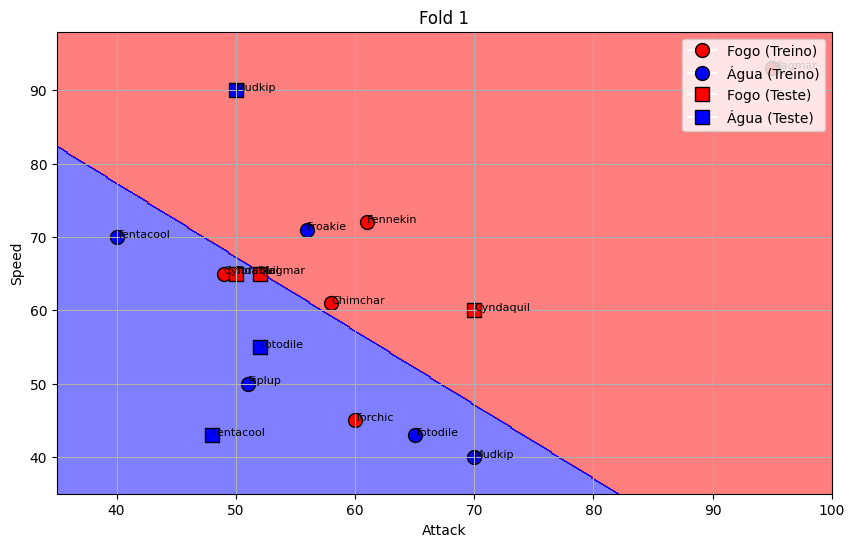

Acurácia Treino: 0.70
Acurácia Teste: 0.50
Z:  [1 1 1 ... 0 0 0]


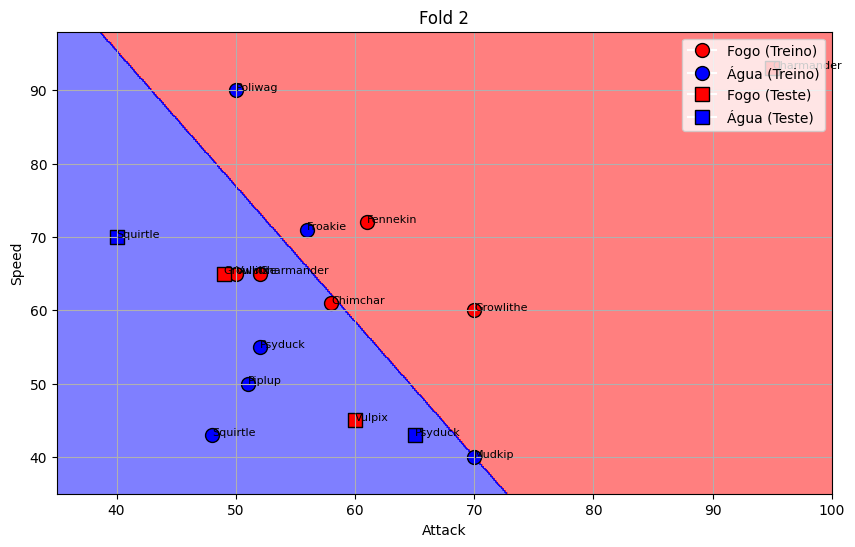

Acurácia Treino: 0.55
Acurácia Teste: 0.60
Z:  [1 1 1 ... 0 0 0]


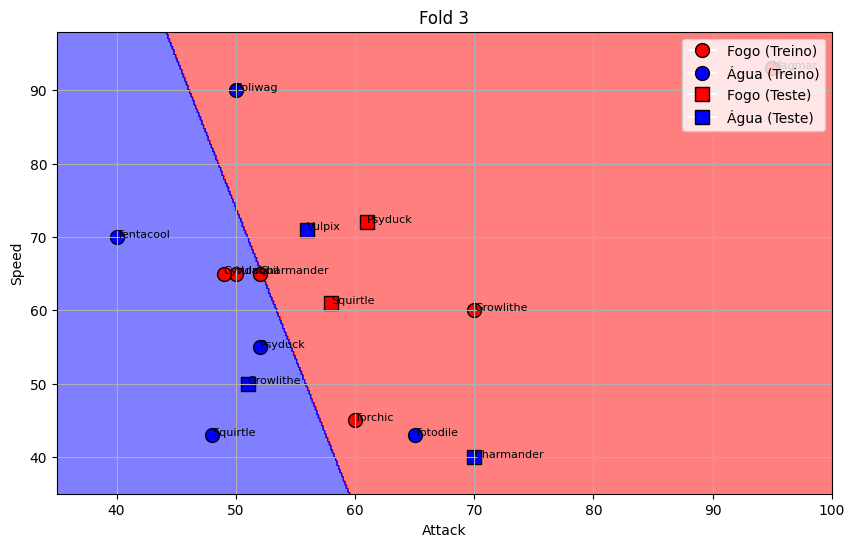

Acurácia Treino: 0.55
Acurácia Teste: 0.60


In [10]:
kf = KFold(n_splits=3)
for fold, (train_index, test_index) in enumerate(kf.split(x_pokemon)):
    model = LogisticRegression()
    model.fit(x_pokemon[train_index], y_pokemon[train_index])
    plot_model(model, x_pokemon[train_index], y_pokemon[train_index], x_pokemon[test_index], y_pokemon[test_index], f'Fold {fold+1}')